In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import os
import sys
from sklearn.model_selection import train_test_split

In [2]:
sys.path.append('/home/alessia/Tirocinio/Fuzzy-SVM')

In [3]:
from HYP_SVM import *

In [11]:
dataset=pd.read_csv("iris-setosa.csv")
X = dataset[["sepal_length", "sepal_width"]].values
y = dataset["species"].values
y=np.where(y==0,-1, y)
#print("features:\n", X, "\nLabels:\n ", y)

In [12]:
from sklearn.preprocessing import StandardScaler
iris_values_std = StandardScaler().fit_transform(X)

from sklearn.decomposition import PCA
pca_2d = PCA(n_components=2)
iris_values_2d = pca_2d.fit_transform(iris_values_std)
#print(iris_values_2d)

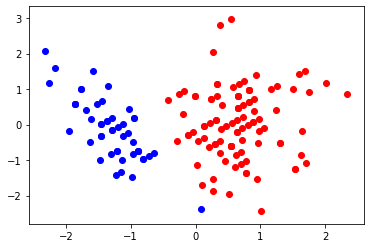

In [13]:
#stampa
%matplotlib inline
import matplotlib.pyplot as plt

def gr_dataset(): 
    for lab, col in zip((1, -1),
                        ('blue', 'red')):
        plt.scatter(iris_values_2d[y==lab, 0],
                    iris_values_2d[y==lab, 1],
                    label=lab,
                    c=col)

gr_dataset()

In [28]:
def gr_membership_contour(estimated_membership):
    x = np.arange(-4, 4, .1)
    y = np.arange(-4, 4, .1)
    X, Y = np.meshgrid(x, y)
    #print(Y)
    zs = np.array([estimated_membership(np.array(list(zip(np.ravel(x), np.ravel(y)))))
                   for x,y in zip(np.ravel(X), np.ravel(Y))])
    Z = zs.reshape(X.shape)
    #print(Z.min())
    normalized = (Z-Z.min())/(Z.max()-Z.min())
    #print(Z)
    membership_contour = plt.contour(X, Y, normalized,
                                     levels=(.1, .3, .5, .95), colors='k')
    #print(membership_contour)
    plt.clabel(membership_contour, inline=1)

In [15]:
def generator(m):
    return (-4 + np.random.random(2*m) * 8).reshape((m, 2))

In [16]:
xTrain, xTest, yTrain, yTest = train_test_split(iris_values_2d, y, test_size=80)

In [18]:
C_vals = [1e-2, 1e-1, 1, 1e+1, 1e+2, 1e+3, 1e+4]
sigma = [9e-2, 9e-1, 9, 9e+1, 9e+2, 9e+3, 9e+4]
parameters = {'C': C_vals, 'sigma': sigma}

model = HYP_SVM(C=100, kernel=gaussian_kernel, sigma=0.9)

clf = GridSearchCV(model, parameters, cv=5)
grid_result = clf.fit(X=xTrain, y=yTrain)

     pcost       dcost       gap    pres   dres
 0: -1.3448e+01 -4.0442e+00  2e+02  1e+01  2e-16
 1: -2.9744e+00 -1.1832e+00  1e+01  1e+00  5e-16
 2: -4.5364e-01 -1.0198e+00  8e-01  1e-02  8e-16
 3: -4.1688e-01 -4.3950e-01  2e-02  1e-17  8e-16
 4: -4.1780e-01 -4.2016e-01  2e-03  3e-17  3e-16
 5: -4.1796e-01 -4.1815e-01  2e-04  1e-17  3e-16
 6: -4.1799e-01 -4.1800e-01  9e-06  1e-17  3e-16
 7: -4.1799e-01 -4.1799e-01  1e-07  2e-17  3e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.3448e+01 -4.0442e+00  2e+02  1e+01  2e-16
 1: -2.9744e+00 -1.1832e+00  1e+01  1e+00  5e-16
 2: -4.5364e-01 -1.0198e+00  8e-01  1e-02  8e-16
 3: -4.1688e-01 -4.3950e-01  2e-02  1e-17  8e-16
 4: -4.1780e-01 -4.2016e-01  2e-03  3e-17  3e-16
 5: -4.1796e-01 -4.1815e-01  2e-04  1e-17  3e-16
 6: -4.1799e-01 -4.1800e-01  9e-06  1e-17  3e-16
 7: -4.1799e-01 -4.1799e-01  1e-07  2e-17  3e-16
Optimal solution found.
[-0.2571812  -0.23950699 -0.24951966 -0.24900436 -0.25269734 -0.25718203

     pcost       dcost       gap    pres   dres
 0: -4.1875e+00 -2.6442e+00  3e+02  2e+01  2e-16
 1: -2.0484e+00 -1.8433e+00  1e+01  9e-01  5e-16
 2: -3.9685e-01 -1.1405e+00  9e-01  1e-02  2e-15
 3: -4.1002e-01 -4.7149e-01  6e-02  6e-04  3e-16
 4: -4.1971e-01 -4.2749e-01  8e-03  7e-05  4e-16
 5: -4.2265e-01 -4.2412e-01  1e-03  1e-17  4e-16
 6: -4.2313e-01 -4.2342e-01  3e-04  1e-17  6e-16
 7: -4.2324e-01 -4.2328e-01  4e-05  2e-17  4e-16
 8: -4.2326e-01 -4.2326e-01  6e-06  1e-17  4e-16
 9: -4.2326e-01 -4.2326e-01  1e-07  2e-17  5e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -4.1875e+00 -2.6442e+00  3e+02  2e+01  2e-16
 1: -2.0484e+00 -1.8433e+00  1e+01  9e-01  5e-16
 2: -3.9685e-01 -1.1405e+00  9e-01  1e-02  2e-15
 3: -4.1002e-01 -4.7149e-01  6e-02  6e-04  3e-16
 4: -4.1971e-01 -4.2749e-01  8e-03  7e-05  4e-16
 5: -4.2265e-01 -4.2412e-01  1e-03  1e-17  4e-16
 6: -4.2313e-01 -4.2342e-01  3e-04  1e-17  6e-16
 7: -4.2324e-01 -4.2328e-01  4e-05  2e-17  4e-1

     pcost       dcost       gap    pres   dres
 0: -2.3815e+01 -1.2205e+00  3e+02  2e+01  7e-16
 1: -5.8808e-01 -1.1819e+00  4e+00  2e-01  8e-16
 2: -3.4095e-01 -8.1568e-01  5e-01  1e-03  7e-16
 3: -3.3987e-01 -3.4543e-01  6e-03  2e-05  4e-16
 4: -3.3999e-01 -3.4006e-01  7e-05  2e-07  4e-16
 5: -3.3999e-01 -3.4000e-01  8e-06  2e-08  3e-16
 6: -3.4000e-01 -3.4000e-01  1e-06  2e-09  3e-16
 7: -3.4000e-01 -3.4000e-01  2e-07  3e-10  5e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -2.3815e+01 -1.2205e+00  3e+02  2e+01  7e-16
 1: -5.8808e-01 -1.1819e+00  4e+00  2e-01  8e-16
 2: -3.4095e-01 -8.1568e-01  5e-01  1e-03  7e-16
 3: -3.3987e-01 -3.4543e-01  6e-03  2e-05  4e-16
 4: -3.3999e-01 -3.4006e-01  7e-05  2e-07  4e-16
 5: -3.3999e-01 -3.4000e-01  8e-06  2e-08  3e-16
 6: -3.4000e-01 -3.4000e-01  1e-06  2e-09  3e-16
 7: -3.4000e-01 -3.4000e-01  2e-07  3e-10  5e-16
Optimal solution found.
[-0.39280232 -0.39282431 -0.39288161 -0.39282986 -0.39281054 -0.39278028

[-0.21428626 -0.2142861  -0.21428572 -0.21428612 -0.21428479 -0.21428663
 -0.21428588 -0.21428571 -0.21428461 -0.21428593 -0.21428615 -0.21428568
 -0.21428602 -0.21428532]
GM 0.0
0 out of 14 predictions correct
Accuracy 0.0
Errore quadratico medio:  0.8010196121123357
     pcost       dcost       gap    pres   dres
 0: -2.6512e+01 -1.1730e+00  3e+02  2e+01  7e-16
 1: -6.5072e-01 -1.1679e+00  3e+00  2e-01  1e-15
 2: -4.0628e-01 -8.2812e-01  4e-01  3e-17  7e-16
 3: -4.1986e-01 -4.3437e-01  1e-02  3e-17  5e-16
 4: -4.2000e-01 -4.2014e-01  1e-04  1e-17  6e-16
 5: -4.2000e-01 -4.2000e-01  1e-06  2e-17  6e-16
 6: -4.2000e-01 -4.2000e-01  2e-08  1e-17  3e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -2.6512e+01 -1.1730e+00  3e+02  2e+01  7e-16
 1: -6.5072e-01 -1.1679e+00  3e+00  2e-01  1e-15
 2: -4.0628e-01 -8.2812e-01  4e-01  3e-17  7e-16
 3: -4.1986e-01 -4.3437e-01  1e-02  3e-17  5e-16
 4: -4.2000e-01 -4.2014e-01  1e-04  1e-17  6e-16
 5: -4.2000e-01 -4.2000

     pcost       dcost       gap    pres   dres
 0: -2.6981e+01 -1.1676e+00  3e+02  2e+01  6e-16
 1: -6.6074e-01 -1.1626e+00  3e+00  2e-01  8e-16
 2: -4.2098e-01 -8.2891e-01  4e-01  3e-17  5e-16
 3: -4.3981e-01 -4.6176e-01  2e-02  1e-17  6e-16
 4: -4.4000e-01 -4.4022e-01  2e-04  1e-17  5e-16
 5: -4.4000e-01 -4.4000e-01  2e-06  2e-17  5e-16
 6: -4.4000e-01 -4.4000e-01  2e-08  1e-17  4e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -2.6981e+01 -1.1676e+00  3e+02  2e+01  6e-16
 1: -6.6074e-01 -1.1626e+00  3e+00  2e-01  8e-16
 2: -4.2098e-01 -8.2891e-01  4e-01  3e-17  5e-16
 3: -4.3981e-01 -4.6176e-01  2e-02  1e-17  6e-16
 4: -4.4000e-01 -4.4022e-01  2e-04  1e-17  5e-16
 5: -4.4000e-01 -4.4000e-01  2e-06  2e-17  5e-16
 6: -4.4000e-01 -4.4000e-01  2e-08  1e-17  4e-16
Optimal solution found.
[-0.21428571 -0.21428571 -0.21428571 -0.21428571 -0.21428571 -0.21428571
 -0.21428571 -0.21428571 -0.21428571 -0.21428571 -0.21428571 -0.21428571
 -0.21428571 -0.21428571

     pcost       dcost       gap    pres   dres
 0: -3.9512e+00 -9.7910e+00  2e+02  1e+01  2e-16
 1: -2.6027e+00 -8.9241e+00  1e+01  4e-01  4e-16
 2: -2.4193e+00 -3.8254e+00  1e+00  2e-16  4e-16
 3: -2.5885e+00 -2.8128e+00  2e-01  1e-16  2e-16
 4: -2.6707e+00 -2.7181e+00  5e-02  1e-16  2e-16
 5: -2.6886e+00 -2.6974e+00  9e-03  1e-16  2e-16
 6: -2.6928e+00 -2.6930e+00  2e-04  2e-16  2e-16
 7: -2.6929e+00 -2.6929e+00  2e-06  2e-16  2e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -3.9512e+00 -9.7910e+00  2e+02  1e+01  2e-16
 1: -2.6027e+00 -8.9241e+00  1e+01  4e-01  4e-16
 2: -2.4193e+00 -3.8254e+00  1e+00  2e-16  4e-16
 3: -2.5885e+00 -2.8128e+00  2e-01  1e-16  2e-16
 4: -2.6707e+00 -2.7181e+00  5e-02  1e-16  2e-16
 5: -2.6886e+00 -2.6974e+00  9e-03  1e-16  2e-16
 6: -2.6928e+00 -2.6930e+00  2e-04  2e-16  2e-16
 7: -2.6929e+00 -2.6929e+00  2e-06  2e-16  2e-16
Optimal solution found.
[-0.91817875 -0.91183516 -0.96562434 -0.70960031  0.16176378 -0.59740474

[-0.3923126  -0.392535   -0.39309404 -0.39259352 -0.39239454 -0.39208739
 -0.39302374 -0.39296531 -0.39248815 -0.39231843 -0.39249992 -0.39305298
 -0.39301794 -0.39322569]
GM 0.0
0 out of 14 predictions correct
Accuracy 0.0
Errore quadratico medio:  1.2657526907226646
     pcost       dcost       gap    pres   dres
 0: -2.8147e+01 -1.1869e+01  3e+02  2e+01  8e-16
 1: -4.0480e+00 -1.1311e+01  9e+00  1e-01  7e-16
 2: -3.9812e+00 -4.2239e+00  2e-01  4e-05  4e-16
 3: -3.9987e+00 -4.0026e+00  4e-03  7e-07  5e-16
 4: -3.9990e+00 -3.9999e+00  8e-04  1e-07  4e-16
 5: -3.9992e+00 -3.9994e+00  2e-04  3e-08  4e-16
 6: -3.9993e+00 -3.9993e+00  5e-05  5e-09  3e-16
 7: -3.9993e+00 -3.9993e+00  1e-05  1e-09  4e-16
 8: -3.9993e+00 -3.9993e+00  4e-06  2e-10  3e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -2.8147e+01 -1.1869e+01  3e+02  2e+01  8e-16
 1: -4.0480e+00 -1.1311e+01  9e+00  1e-01  7e-16
 2: -3.9812e+00 -4.2239e+00  2e-01  4e-05  4e-16
 3: -3.9987e+00 -4.0026

     pcost       dcost       gap    pres   dres
 0: -2.9384e+01 -1.1719e+01  3e+02  2e+01  8e-16
 1: -4.2019e+00 -1.1227e+01  8e+00  6e-02  8e-16
 2: -4.3935e+00 -4.6350e+00  2e-01  2e-03  4e-16
 3: -4.3999e+00 -4.4024e+00  3e-03  2e-05  4e-16
 4: -4.4000e+00 -4.4000e+00  4e-05  2e-07  4e-16
 5: -4.4000e+00 -4.4000e+00  1e-05  6e-08  3e-16
 6: -4.4000e+00 -4.4000e+00  8e-06  4e-08  3e-16
 7: -4.4000e+00 -4.4000e+00  5e-06  2e-08  3e-16
 8: -4.4000e+00 -4.4000e+00  2e-06  4e-09  4e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -2.9384e+01 -1.1719e+01  3e+02  2e+01  8e-16
 1: -4.2019e+00 -1.1227e+01  8e+00  6e-02  8e-16
 2: -4.3935e+00 -4.6350e+00  2e-01  2e-03  4e-16
 3: -4.3999e+00 -4.4024e+00  3e-03  2e-05  4e-16
 4: -4.4000e+00 -4.4000e+00  4e-05  2e-07  4e-16
 5: -4.4000e+00 -4.4000e+00  1e-05  6e-08  3e-16
 6: -4.4000e+00 -4.4000e+00  8e-06  4e-08  3e-16
 7: -4.4000e+00 -4.4000e+00  5e-06  2e-08  3e-16
 8: -4.4000e+00 -4.4000e+00  2e-06  4e-09  4e-1

 0: -2.8286e+01 -1.1829e+01  3e+02  2e+01  8e-16
 1: -4.0508e+00 -1.1308e+01  9e+00  1e-01  7e-16
 2: -3.9824e+00 -4.2231e+00  2e-01  1e-05  5e-16
 3: -3.9998e+00 -4.0023e+00  2e-03  1e-07  4e-16
 4: -4.0000e+00 -4.0000e+00  2e-05  1e-09  5e-16
 5: -4.0000e+00 -4.0000e+00  2e-07  1e-11  5e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -2.8286e+01 -1.1829e+01  3e+02  2e+01  8e-16
 1: -4.0508e+00 -1.1308e+01  9e+00  1e-01  7e-16
 2: -3.9824e+00 -4.2231e+00  2e-01  1e-05  5e-16
 3: -3.9998e+00 -4.0023e+00  2e-03  1e-07  4e-16
 4: -4.0000e+00 -4.0000e+00  2e-05  1e-09  5e-16
 5: -4.0000e+00 -4.0000e+00  2e-07  1e-11  5e-16
Optimal solution found.
[-0.28571428 -0.28571429 -0.28571429 -0.28571429 -0.28571429 -0.28571429
 -0.28571429 -0.28571429 -0.28571428 -0.28571428 -0.28571429 -0.28571429
 -0.28571429 -0.28571429]
GM 0.0
0 out of 14 predictions correct
Accuracy 0.0
Errore quadratico medio:  0.9183673460715523
     pcost       dcost       gap    pres   dres

     pcost       dcost       gap    pres   dres
 0: -4.0759e+00 -7.6657e+01  3e+02  1e+00  5e-16
 1: -2.4962e+00 -3.3668e+01  3e+01  3e-16  4e-16
 2: -4.4283e+00 -9.3078e+00  5e+00  1e-16  4e-16
 3: -5.3905e+00 -7.0089e+00  2e+00  3e-16  3e-16
 4: -5.8441e+00 -6.0361e+00  2e-01  2e-16  3e-16
 5: -5.9053e+00 -5.9234e+00  2e-02  6e-16  2e-16
 6: -5.9129e+00 -5.9135e+00  6e-04  1e-15  3e-16
 7: -5.9132e+00 -5.9132e+00  2e-05  4e-16  2e-16
 8: -5.9132e+00 -5.9132e+00  5e-07  2e-16  3e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -4.0759e+00 -7.6657e+01  3e+02  1e+00  5e-16
 1: -2.4962e+00 -3.3668e+01  3e+01  3e-16  4e-16
 2: -4.4283e+00 -9.3078e+00  5e+00  1e-16  4e-16
 3: -5.3905e+00 -7.0089e+00  2e+00  3e-16  3e-16
 4: -5.8441e+00 -6.0361e+00  2e-01  2e-16  3e-16
 5: -5.9053e+00 -5.9234e+00  2e-02  6e-16  2e-16
 6: -5.9129e+00 -5.9135e+00  6e-04  1e-15  3e-16
 7: -5.9132e+00 -5.9132e+00  2e-05  4e-16  2e-16
 8: -5.9132e+00 -5.9132e+00  5e-07  2e-16  3e-1

     pcost       dcost       gap    pres   dres
 0: -5.1103e+01 -1.2343e+02  3e+02  2e+00  1e-15
 1: -3.7621e+01 -8.1152e+01  4e+01  2e-15  1e-15
 2: -3.9869e+01 -4.0764e+01  9e-01  2e-16  1e-15
 3: -3.9901e+01 -4.0018e+01  1e-01  2e-15  1e-15
 4: -3.9917e+01 -3.9967e+01  5e-02  2e-15  1e-15
 5: -3.9926e+01 -3.9939e+01  1e-02  2e-16  1e-15
 6: -3.9929e+01 -3.9934e+01  4e-03  6e-16  1e-15
 7: -3.9931e+01 -3.9932e+01  1e-03  1e-15  1e-15
 8: -3.9931e+01 -3.9931e+01  3e-04  6e-16  1e-15
 9: -3.9931e+01 -3.9931e+01  3e-05  7e-16  1e-15
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -5.1103e+01 -1.2343e+02  3e+02  2e+00  1e-15
 1: -3.7621e+01 -8.1152e+01  4e+01  2e-15  1e-15
 2: -3.9869e+01 -4.0764e+01  9e-01  2e-16  1e-15
 3: -3.9901e+01 -4.0018e+01  1e-01  2e-15  1e-15
 4: -3.9917e+01 -3.9967e+01  5e-02  2e-15  1e-15
 5: -3.9926e+01 -3.9939e+01  1e-02  2e-16  1e-15
 6: -3.9929e+01 -3.9934e+01  4e-03  6e-16  1e-15
 7: -3.9931e+01 -3.9932e+01  1e-03  1e-15  1e-1

     pcost       dcost       gap    pres   dres
 0: -5.2500e+01 -1.2250e+02  3e+02  2e+00  1e-15
 1: -3.9265e+01 -8.1085e+01  4e+01  1e-15  1e-15
 2: -4.1973e+01 -4.3587e+01  2e+00  7e-16  1e-15
 3: -4.2000e+01 -4.2016e+01  2e-02  4e-16  1e-15
 4: -4.2000e+01 -4.2000e+01  2e-04  6e-16  1e-15
 5: -4.2000e+01 -4.2000e+01  2e-05  2e-15  1e-15
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -5.2500e+01 -1.2250e+02  3e+02  2e+00  1e-15
 1: -3.9265e+01 -8.1085e+01  4e+01  1e-15  1e-15
 2: -4.1973e+01 -4.3587e+01  2e+00  7e-16  1e-15
 3: -4.2000e+01 -4.2016e+01  2e-02  4e-16  1e-15
 4: -4.2000e+01 -4.2000e+01  2e-04  6e-16  1e-15
 5: -4.2000e+01 -4.2000e+01  2e-05  2e-15  1e-15
Optimal solution found.
[-0.24999998 -0.24999938 -0.25000075 -0.24999951 -0.25000034 -0.25000052
 -0.24999932 -0.25000083 -0.25000006 -0.25000018 -0.25000043 -0.24999968
 -0.25000037 -0.25000068]
GM 0.0
0 out of 14 predictions correct
Accuracy 0.0
Errore quadratico medio:  0.8482134671401063

[-0.99999995  1.00000016 -0.17754873 -0.11865121 -0.51864855 -0.99999992
  0.33496072 -0.17754873 -0.20772023 -0.17754934 -0.17754877  0.1836561
 -1.00000002 -0.17754915]
GM 0.0
0 out of 14 predictions correct
Accuracy 0.0
Errore quadratico medio:  0.47154359094239834
     pcost       dcost       gap    pres   dres
 0:  1.7399e+02 -1.6542e+03  2e+03  2e-14  2e-15
 1:  3.2367e+01 -1.9347e+02  2e+02  2e-14  1e-15
 2: -1.6112e+01 -4.1233e+01  3e+01  2e-15  5e-16
 3: -1.9491e+01 -2.1187e+01  2e+00  2e-15  2e-16
 4: -1.9536e+01 -1.9590e+01  5e-02  2e-16  1e-16
 5: -1.9536e+01 -1.9537e+01  8e-04  4e-16  1e-16
 6: -1.9536e+01 -1.9536e+01  8e-06  3e-16  1e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.7399e+02 -1.6542e+03  2e+03  2e-14  2e-15
 1:  3.2367e+01 -1.9347e+02  2e+02  2e-14  1e-15
 2: -1.6112e+01 -4.1233e+01  3e+01  2e-15  5e-16
 3: -1.9491e+01 -2.1187e+01  2e+00  2e-15  2e-16
 4: -1.9536e+01 -1.9590e+01  5e-02  2e-16  1e-16
 5: -1.9536e+01 -1.9537

     pcost       dcost       gap    pres   dres
 0:  1.3998e+02 -1.4639e+03  2e+03  2e-01  2e-15
 1:  5.7674e+01 -1.7283e+02  3e+02  1e-02  2e-15
 2:  1.5914e+00 -3.4821e+01  4e+01  6e-04  2e-15
 3: -8.1150e+00 -1.8013e+01  1e+01  1e-04  1e-15
 4: -1.1683e+01 -1.3919e+01  2e+00  4e-06  8e-16
 5: -1.2310e+01 -1.2894e+01  6e-01  6e-07  5e-16
 6: -1.2531e+01 -1.2563e+01  3e-02  2e-16  7e-16
 7: -1.2546e+01 -1.2547e+01  6e-04  4e-15  6e-16
 8: -1.2547e+01 -1.2547e+01  7e-06  3e-16  7e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.3998e+02 -1.4639e+03  2e+03  2e-01  2e-15
 1:  5.7674e+01 -1.7283e+02  3e+02  1e-02  2e-15
 2:  1.5914e+00 -3.4821e+01  4e+01  6e-04  2e-15
 3: -8.1150e+00 -1.8013e+01  1e+01  1e-04  1e-15
 4: -1.1683e+01 -1.3919e+01  2e+00  4e-06  8e-16
 5: -1.2310e+01 -1.2894e+01  6e-01  6e-07  5e-16
 6: -1.2531e+01 -1.2563e+01  3e-02  2e-16  7e-16
 7: -1.2546e+01 -1.2547e+01  6e-04  4e-15  6e-16
 8: -1.2547e+01 -1.2547e+01  7e-06  3e-16  7e-1

[-0.18863669 -0.27516619 -0.26310347 -0.2667905  -0.26854937 -0.19944048
 -0.25950187 -0.25472848 -0.16820152 -0.1729733  -0.25472848 -0.27935346
 -0.21209241 -0.27993905]
GM 0.0
0 out of 14 predictions correct
Accuracy 0.0
Errore quadratico medio:  0.8499483214772966
     pcost       dcost       gap    pres   dres
 0: -2.7720e+02 -1.7396e+03  1e+03  3e-17  7e-15
 1: -3.2490e+02 -4.5089e+02  1e+02  2e-15  6e-15
 2: -3.8579e+02 -4.0051e+02  1e+01  1e-14  8e-15
 3: -3.9014e+02 -3.9628e+02  6e+00  2e-16  7e-15
 4: -3.9211e+02 -3.9385e+02  2e+00  1e-14  9e-15
 5: -3.9282e+02 -3.9325e+02  4e-01  1e-14  8e-15
 6: -3.9303e+02 -3.9307e+02  5e-02  4e-15  9e-15
 7: -3.9305e+02 -3.9305e+02  3e-03  4e-14  1e-14
 8: -3.9305e+02 -3.9305e+02  1e-04  2e-14  9e-15
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -2.7720e+02 -1.7396e+03  1e+03  3e-17  7e-15
 1: -3.2490e+02 -4.5089e+02  1e+02  2e-15  6e-15
 2: -3.8579e+02 -4.0051e+02  1e+01  1e-14  8e-15
 3: -3.9014e+02 -3.9628

     pcost       dcost       gap    pres   dres
 0: -2.6046e+02 -1.8546e+03  2e+03  3e-17  7e-15
 1: -2.9260e+02 -3.9091e+02  1e+02  4e-15  6e-15
 2: -3.3953e+02 -3.4206e+02  3e+00  7e-15  6e-15
 3: -3.3999e+02 -3.4002e+02  3e-02  5e-15  7e-15
 4: -3.4000e+02 -3.4000e+02  1e-03  1e-16  7e-15
 5: -3.4000e+02 -3.4000e+02  2e-04  2e-16  8e-15
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -2.6046e+02 -1.8546e+03  2e+03  3e-17  7e-15
 1: -2.9260e+02 -3.9091e+02  1e+02  4e-15  6e-15
 2: -3.3953e+02 -3.4206e+02  3e+00  7e-15  6e-15
 3: -3.3999e+02 -3.4002e+02  3e-02  5e-15  7e-15
 4: -3.4000e+02 -3.4000e+02  1e-03  1e-16  7e-15
 5: -3.4000e+02 -3.4000e+02  2e-04  2e-16  8e-15
Optimal solution found.
[-0.39285119 -0.39285355 -0.39285984 -0.39285414 -0.39285208 -0.39284883
 -0.39285891 -0.39285871 -0.39285294 -0.39285117 -0.39285328 -0.3928592
 -0.39285893 -0.39286134]
GM 0.0
0 out of 14 predictions correct
Accuracy 0.0
Errore quadratico medio:  1.2665724588780756


Accuracy 0.0
Errore quadratico medio:  0.956884244891543
     pcost       dcost       gap    pres   dres
 0:  2.8791e+04 -9.7258e+04  1e+05  1e-13  2e-14
 1:  6.6438e+03 -9.5438e+03  2e+04  5e-14  2e-14
 2:  8.7891e+02 -1.3934e+03  2e+03  2e-14  5e-15
 3:  8.0026e+01 -2.3493e+02  3e+02  2e-14  2e-15
 4: -1.4471e+01 -5.6148e+01  4e+01  2e-16  7e-16
 5: -2.1678e+01 -2.5260e+01  4e+00  3e-15  2e-16
 6: -2.1814e+01 -2.1902e+01  9e-02  4e-15  1e-16
 7: -2.1815e+01 -2.1816e+01  1e-03  3e-15  1e-16
 8: -2.1815e+01 -2.1815e+01  1e-05  4e-16  1e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  2.8791e+04 -9.7258e+04  1e+05  1e-13  2e-14
 1:  6.6438e+03 -9.5438e+03  2e+04  5e-14  2e-14
 2:  8.7891e+02 -1.3934e+03  2e+03  2e-14  5e-15
 3:  8.0026e+01 -2.3493e+02  3e+02  2e-14  2e-15
 4: -1.4471e+01 -5.6148e+01  4e+01  2e-16  7e-16
 5: -2.1678e+01 -2.5260e+01  4e+00  3e-15  2e-16
 6: -2.1814e+01 -2.1902e+01  9e-02  4e-15  1e-16
 7: -2.1815e+01 -2.1816e+01  1e-03  3e-

     pcost       dcost       gap    pres   dres
 0:  1.7059e+04 -9.2654e+04  1e+05  5e-02  2e-14
 1:  5.1926e+03 -9.1719e+03  2e+04  4e-03  4e-14
 2:  7.7641e+02 -1.0092e+03  2e+03  2e-14  2e-14
 3:  9.5602e+01 -1.6047e+02  3e+02  1e-15  6e-15
 4:  5.7652e+00 -2.9781e+01  4e+01  2e-16  3e-15
 5: -4.2288e+00 -9.7663e+00  6e+00  2e-16  8e-16
 6: -6.3775e+00 -7.8729e+00  1e+00  4e-16  6e-16
 7: -6.8956e+00 -7.1068e+00  2e-01  2e-16  4e-16
 8: -6.9888e+00 -6.9971e+00  8e-03  4e-16  5e-16
 9: -6.9925e+00 -6.9931e+00  6e-04  1e-15  6e-16
10: -6.9928e+00 -6.9928e+00  2e-05  2e-15  5e-16
11: -6.9928e+00 -6.9928e+00  1e-06  2e-16  4e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.7059e+04 -9.2654e+04  1e+05  5e-02  2e-14
 1:  5.1926e+03 -9.1719e+03  2e+04  4e-03  4e-14
 2:  7.7641e+02 -1.0092e+03  2e+03  2e-14  2e-14
 3:  9.5602e+01 -1.6047e+02  3e+02  1e-15  6e-15
 4:  5.7652e+00 -2.9781e+01  4e+01  2e-16  3e-15
 5: -4.2288e+00 -9.7663e+00  6e+00  2e-16  8e-1

[-0.24931529  0.25214006 -0.96631778  0.16062636 -0.59689363 -0.69219526
  0.33995519 -1.01760426 -0.38456917 -0.49431764 -0.69560316 -0.0077161
 -0.58968348 -0.8786795 ]
GM 0.0
0 out of 14 predictions correct
Accuracy 0.0
Errore quadratico medio:  0.3176721034277866
     pcost       dcost       gap    pres   dres
 0: -2.0484e+03 -7.8359e+04  8e+04  6e-14  7e-14
 1: -2.0839e+03 -3.9866e+03  2e+03  2e-16  5e-14
 2: -2.6356e+03 -3.2453e+03  6e+02  4e-14  5e-14
 3: -2.7867e+03 -3.1454e+03  4e+02  2e-16  9e-14
 4: -2.8876e+03 -3.0592e+03  2e+02  2e-13  8e-14
 5: -2.9450e+03 -3.0038e+03  6e+01  3e-14  1e-13
 6: -2.9601e+03 -2.9891e+03  3e+01  3e-14  9e-14
 7: -2.9705e+03 -2.9802e+03  1e+01  7e-14  1e-13
 8: -2.9740e+03 -2.9768e+03  3e+00  1e-13  9e-14
 9: -2.9753e+03 -2.9756e+03  3e-01  2e-13  1e-13
10: -2.9755e+03 -2.9755e+03  3e-03  4e-14  1e-13
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -2.0484e+03 -7.8359e+04  8e+04  6e-14  7e-14
 1: -2.0839e+03 -3.9866e

 0: -2.5929e+03 -6.8910e+04  7e+04  3e-14  6e-14
 1: -2.7041e+03 -4.7517e+03  2e+03  3e-14  6e-14
 2: -3.9768e+03 -4.1234e+03  1e+02  2e-13  5e-14
 3: -3.9892e+03 -4.0030e+03  1e+01  1e-13  8e-14
 4: -3.9920e+03 -3.9942e+03  2e+00  3e-13  9e-14
 5: -3.9929e+03 -3.9933e+03  4e-01  1e-13  1e-13
 6: -3.9931e+03 -3.9931e+03  8e-02  3e-14  7e-14
 7: -3.9931e+03 -3.9931e+03  2e-02  7e-14  1e-13
 8: -3.9931e+03 -3.9931e+03  3e-03  4e-14  1e-13
Optimal solution found.
[-0.27966949 -0.28832489 -0.2871149  -0.28748979 -0.28766237 -0.28074955
 -0.28675488 -0.28627981 -0.27762441 -0.27809948 -0.28627981 -0.28874244
 -0.28201707 -0.28879996]
GM 0.0
0 out of 14 predictions correct
Accuracy 0.0
Errore quadratico medio:  0.9111635954111882
     pcost       dcost       gap    pres   dres
 0: -2.5930e+03 -6.8906e+04  7e+04  7e-14  7e-14
 1: -2.7042e+03 -4.7510e+03  2e+03  1e-13  6e-14
 2: -3.9773e+03 -4.1230e+03  1e+02  7e-14  7e-14
 3: -3.9896e+03 -4.0014e+03  1e+01  1e-13  7e-14
 4: -3.9921e+03 -3.993

     pcost       dcost       gap    pres   dres
 0: -2.5971e+03 -6.8914e+04  7e+04  7e-14  6e-14
 1: -2.7091e+03 -4.7552e+03  2e+03  6e-14  5e-14
 2: -3.9871e+03 -4.1310e+03  1e+02  6e-14  8e-14
 3: -3.9999e+03 -4.0013e+03  1e+00  4e-14  9e-14
 4: -4.0000e+03 -4.0000e+03  2e-02  1e-13  9e-14
 5: -4.0000e+03 -4.0000e+03  1e-03  1e-13  8e-14
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -2.5971e+03 -6.8914e+04  7e+04  7e-14  6e-14
 1: -2.7091e+03 -4.7552e+03  2e+03  6e-14  5e-14
 2: -3.9871e+03 -4.1310e+03  1e+02  6e-14  8e-14
 3: -3.9999e+03 -4.0013e+03  1e+00  4e-14  9e-14
 4: -4.0000e+03 -4.0000e+03  2e-02  1e-13  9e-14
 5: -4.0000e+03 -4.0000e+03  1e-03  1e-13  8e-14
Optimal solution found.
[-0.28571357 -0.28571459 -0.28571445 -0.28571449 -0.28571452 -0.2857137
 -0.28571441 -0.28571435 -0.28571333 -0.28571339 -0.28571435 -0.28571464
 -0.28571385 -0.28571465]
GM 0.0
0 out of 14 predictions correct
Accuracy 0.0
Errore quadratico medio:  0.9183664934851282


 6: -2.4348e+00 -8.9195e+01  9e+01  4e-15  1e-15
 7: -2.1941e+01 -3.1422e+01  9e+00  2e-16  3e-16
 8: -2.2641e+01 -2.2911e+01  3e-01  7e-16  2e-16
 9: -2.2644e+01 -2.2647e+01  4e-03  7e-16  1e-16
10: -2.2644e+01 -2.2644e+01  4e-05  2e-16  1e-16
11: -2.2644e+01 -2.2644e+01  4e-07  2e-16  1e-16
Optimal solution found.
[-0.18825299 -0.15723641 -0.16546474 -0.16642064  1.00000001 -0.13416542
 -0.49315822 -0.13417383 -0.13416492 -0.18782377 -0.16715117 -1.
 -1.          0.78564492]
GM 0.0
0 out of 14 predictions correct
Accuracy 0.0
Errore quadratico medio:  0.5144461406068811
     pcost       dcost       gap    pres   dres
 0:  1.7509e+06 -8.7359e+06  1e+07  2e-02  2e-13
 1:  4.8914e+05 -9.2964e+05  1e+06  2e-03  8e-13
 2:  7.8163e+04 -1.0260e+05  2e+05  2e-06  3e-13
 3:  1.1178e+04 -1.3357e+04  2e+04  1e-13  8e-14
 4:  1.5446e+03 -1.9322e+03  3e+03  2e-14  2e-14
 5:  1.9513e+02 -2.9989e+02  5e+02  5e-15  9e-15
 6:  1.4917e+01 -5.4454e+01  7e+01  2e-15  3e-15
 7: -6.5561e+00 -1.6219e+01  1

 -2.13564457  1.48453924]
GM 0.0
0 out of 14 predictions correct
Accuracy 0.0
Errore quadratico medio:  0.26810855666293576
     pcost       dcost       gap    pres   dres
 0:  2.1188e+06 -1.5449e+07  2e+07  8e-13  6e-13
 1:  7.8534e+05 -1.4490e+06  2e+06  1e-12  5e-13
 2:  1.2551e+05 -1.8003e+05  3e+05  3e-13  3e-13
 3:  1.9391e+04 -3.7638e+04  6e+04  1e-13  1e-13
 4:  2.5077e+03 -4.4264e+03  7e+03  6e-14  7e-14
 5:  4.5575e+02 -4.2032e+03  5e+03  1e-13  2e-13
 6: -2.0631e+01 -3.6053e+03  4e+03  8e-14  8e-14
 7: -8.9652e+02 -2.3430e+03  1e+03  3e-14  7e-14
 8: -1.0636e+03 -2.1463e+03  1e+03  7e-14  8e-14
 9: -1.4127e+03 -1.6346e+03  2e+02  2e-13  1e-13
10: -1.5057e+03 -1.5106e+03  5e+00  2e-13  2e-13
11: -1.5078e+03 -1.5079e+03  5e-02  3e-13  2e-13
12: -1.5079e+03 -1.5079e+03  5e-04  2e-13  2e-13
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  2.1188e+06 -1.5449e+07  2e+07  8e-13  6e-13
 1:  7.8534e+05 -1.4490e+06  2e+06  1e-12  5e-13
 2:  1.2551e+05 -1.80

     pcost       dcost       gap    pres   dres
 0:  1.6201e+04 -5.4738e+06  5e+06  7e-13  7e-13
 1:  1.5092e+04 -1.4267e+05  2e+05  3e-13  7e-13
 2: -1.0075e+03 -5.8191e+04  6e+04  2e-13  6e-13
 3: -5.9006e+03 -3.3289e+04  3e+04  3e-13  5e-13
 4: -8.9073e+03 -2.2375e+04  1e+04  7e-13  5e-13
 5: -1.0601e+04 -1.5992e+04  5e+03  5e-13  5e-13
 6: -1.1614e+04 -1.4345e+04  3e+03  3e-13  6e-13
 7: -1.2252e+04 -1.3466e+04  1e+03  9e-13  5e-13
 8: -1.2602e+04 -1.3088e+04  5e+02  1e-12  6e-13
 9: -1.2757e+04 -1.2879e+04  1e+02  1e-12  7e-13
10: -1.2809e+04 -1.2815e+04  7e+00  1e-12  8e-13
11: -1.2811e+04 -1.2812e+04  2e-01  1e-13  7e-13
12: -1.2812e+04 -1.2812e+04  3e-03  1e-13  7e-13
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.6201e+04 -5.4738e+06  5e+06  7e-13  7e-13
 1:  1.5092e+04 -1.4267e+05  2e+05  3e-13  7e-13
 2: -1.0075e+03 -5.8191e+04  6e+04  2e-13  6e-13
 3: -5.9006e+03 -3.3289e+04  3e+04  3e-13  5e-13
 4: -8.9073e+03 -2.2375e+04  1e+04  7e-13  5e-1

     pcost       dcost       gap    pres   dres
 0: -2.5328e+04 -5.8316e+06  6e+06  5e-13  6e-13
 1: -2.5446e+04 -9.7710e+04  7e+04  1e-13  4e-13
 2: -3.2017e+04 -4.0484e+04  8e+03  5e-13  5e-13
 3: -3.5071e+04 -4.0552e+04  5e+03  2e-16  6e-13
 4: -3.8737e+04 -3.9725e+04  1e+03  9e-13  9e-13
 5: -3.9231e+04 -3.9348e+04  1e+02  1e-13  1e-12
 6: -3.9302e+04 -3.9315e+04  1e+01  6e-13  1e-12
 7: -3.9309e+04 -3.9312e+04  3e+00  5e-13  9e-13
 8: -3.9310e+04 -3.9311e+04  2e-01  1e-12  7e-13
 9: -3.9311e+04 -3.9311e+04  6e-03  2e-13  7e-13
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -2.5328e+04 -5.8316e+06  6e+06  5e-13  6e-13
 1: -2.5446e+04 -9.7710e+04  7e+04  1e-13  4e-13
 2: -3.2017e+04 -4.0484e+04  8e+03  5e-13  5e-13
 3: -3.5071e+04 -4.0552e+04  5e+03  2e-16  6e-13
 4: -3.8737e+04 -3.9725e+04  1e+03  9e-13  9e-13
 5: -3.9231e+04 -3.9348e+04  1e+02  1e-13  1e-12
 6: -3.9302e+04 -3.9315e+04  1e+01  6e-13  1e-12
 7: -3.9309e+04 -3.9312e+04  3e+00  5e-13  9e-1

     pcost       dcost       gap    pres   dres
 0: -2.6737e+04 -4.8310e+06  5e+06  3e-13  6e-13
 1: -2.6927e+04 -9.2007e+04  7e+04  1e-16  4e-13
 2: -3.6652e+04 -4.4751e+04  8e+03  1e-13  5e-13
 3: -4.3915e+04 -4.4064e+04  1e+02  8e-13  6e-13
 4: -4.3976e+04 -4.4002e+04  3e+01  1e-13  6e-13
 5: -4.3990e+04 -4.3992e+04  2e+00  3e-13  7e-13
 6: -4.3991e+04 -4.3991e+04  7e-01  1e-13  8e-13
 7: -4.3991e+04 -4.3991e+04  2e-01  1e-12  7e-13
 8: -4.3991e+04 -4.3991e+04  7e-02  2e-16  6e-13
 9: -4.3991e+04 -4.3991e+04  7e-03  1e-12  9e-13
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -2.6737e+04 -4.8310e+06  5e+06  3e-13  6e-13
 1: -2.6927e+04 -9.2007e+04  7e+04  1e-16  4e-13
 2: -3.6652e+04 -4.4751e+04  8e+03  1e-13  5e-13
 3: -4.3915e+04 -4.4064e+04  1e+02  8e-13  6e-13
 4: -4.3976e+04 -4.4002e+04  3e+01  1e-13  6e-13
 5: -4.3990e+04 -4.3992e+04  2e+00  3e-13  7e-13
 6: -4.3991e+04 -4.3991e+04  7e-01  1e-13  8e-13
 7: -4.3991e+04 -4.3991e+04  2e-01  1e-12  7e-1

     pcost       dcost       gap    pres   dres
 0:  2.7522e+08 -9.6786e+08  1e+09  3e-11  2e-12
 1:  7.1130e+07 -9.8545e+07  2e+08  1e-11  1e-12
 2:  1.0602e+07 -1.2710e+07  2e+07  8e-13  7e-13
 3:  1.5295e+06 -1.7304e+06  3e+06  1e-12  2e-13
 4:  2.1846e+05 -2.4661e+05  5e+05  6e-13  8e-14
 5:  3.0838e+04 -3.5664e+04  7e+04  1e-13  4e-14
 6:  4.2269e+03 -5.2928e+03  1e+04  7e-14  1e-14
 7:  5.2613e+02 -8.3454e+02  1e+03  2e-14  5e-15
 8:  3.8564e+01 -1.5331e+02  2e+02  3e-14  1e-15
 9: -1.5949e+01 -4.0573e+01  2e+01  3e-15  4e-16
10: -1.9489e+01 -2.1204e+01  2e+00  4e-16  2e-16
11: -1.9536e+01 -1.9592e+01  6e-02  2e-16  1e-16
12: -1.9536e+01 -1.9537e+01  8e-04  6e-16  1e-16
13: -1.9536e+01 -1.9536e+01  8e-06  3e-16  1e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  2.7522e+08 -9.6786e+08  1e+09  3e-11  2e-12
 1:  7.1130e+07 -9.8545e+07  2e+08  1e-11  1e-12
 2:  1.0602e+07 -1.2710e+07  2e+07  8e-13  7e-13
 3:  1.5295e+06 -1.7304e+06  3e+06  1e-12  2e-1

 6:  3.2190e+03 -3.8378e+03  7e+03  3e-14  5e-14
 7:  4.2552e+02 -5.8393e+02  1e+03  3e-15  1e-14
 8:  4.4588e+01 -9.8607e+01  1e+02  5e-15  5e-15
 9: -3.3985e+00 -2.2439e+01  2e+01  9e-16  2e-15
10: -8.4564e+00 -1.3157e+01  5e+00  2e-16  7e-16
11: -1.0246e+01 -1.1371e+01  1e+00  4e-16  6e-16
12: -1.0719e+01 -1.0926e+01  2e-01  2e-15  5e-16
13: -1.0796e+01 -1.0809e+01  1e-02  2e-16  5e-16
14: -1.0802e+01 -1.0802e+01  2e-04  2e-15  5e-16
15: -1.0802e+01 -1.0802e+01  2e-06  9e-16  4e-16
Optimal solution found.
[-0.99787144  1.97431571 -0.99447903  1.59588214 -2.25439052 -1.43400033
  1.67419733 -0.96834013 -0.76031611 -0.68841884 -1.60233869  0.74884606
 -1.96977031 -1.43179317]
GM 0.0
0 out of 14 predictions correct
Accuracy 0.0
Errore quadratico medio:  0.37350850320046236
     pcost       dcost       gap    pres   dres
 0:  1.6707e+08 -9.2325e+08  1e+09  3e-02  3e-12
 1:  5.1702e+07 -1.0156e+08  2e+08  3e-03  1e-10
 2:  8.9725e+06 -1.4832e+07  2e+07  1e-12  3e-12
 3:  1.3581e+06 -1.62

     pcost       dcost       gap    pres   dres
 0:  2.1332e+08 -1.5383e+09  2e+09  3e-12  8e-12
 1:  7.9254e+07 -1.4397e+08  2e+08  5e-12  4e-12
 2:  1.2869e+07 -1.7742e+07  3e+07  4e-12  2e-12
 3:  2.1187e+06 -4.0613e+06  6e+06  1e-12  1e-12
 4:  3.3878e+05 -4.3940e+05  8e+05  1e-12  6e-13
 5:  4.7569e+04 -5.8207e+04  1e+05  3e-13  2e-13
 6:  6.1986e+03 -8.7790e+03  1e+04  2e-13  1e-13
 7:  1.8051e+03 -3.8188e+03  6e+03  1e-13  6e-14
 8: -2.5527e+02 -3.3617e+03  3e+03  4e-14  2e-13
 9: -6.2065e+02 -3.1274e+03  3e+03  3e-13  1e-13
10: -1.8049e+03 -2.0273e+03  2e+02  2e-13  2e-13
11: -1.9124e+03 -1.9155e+03  3e+00  4e-13  2e-13
12: -1.9139e+03 -1.9139e+03  3e-02  6e-13  2e-13
13: -1.9139e+03 -1.9139e+03  3e-04  6e-14  3e-13
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  2.1332e+08 -1.5383e+09  2e+09  3e-12  8e-12
 1:  7.9254e+07 -1.4397e+08  2e+08  5e-12  4e-12
 2:  1.2869e+07 -1.7742e+07  3e+07  4e-12  2e-12
 3:  2.1187e+06 -4.0613e+06  6e+06  1e-12  1e-1

 2:  1.4799e+06 -6.4146e+06  8e+06  6e-12  6e-12
 3:  6.6639e+05 -3.0142e+06  4e+06  9e-13  4e-12
 4:  1.7680e+05 -6.4240e+05  8e+05  5e-12  3e-12
 5:  1.6870e+04 -1.4505e+05  2e+05  3e-12  3e-12
 6: -1.5165e+04 -9.2262e+04  8e+04  5e-12  2e-12
 7: -3.2049e+04 -6.4929e+04  3e+04  2e-12  2e-12
 8: -3.7344e+04 -5.7881e+04  2e+04  5e-12  3e-12
 9: -4.1546e+04 -5.0410e+04  9e+03  4e-12  3e-12
10: -4.3818e+04 -4.5704e+04  2e+03  4e-12  4e-12
11: -4.4544e+04 -4.4949e+04  4e+02  7e-12  3e-12
12: -4.4731e+04 -4.4776e+04  5e+01  7e-12  3e-12
13: -4.4751e+04 -4.4752e+04  5e-01  5e-12  3e-12
14: -4.4752e+04 -4.4752e+04  5e-03  5e-12  3e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  3.9699e+06 -5.4185e+08  5e+08  6e-12  7e-12
 1:  3.7890e+06 -1.4093e+07  2e+07  2e-12  8e-12
 2:  1.4799e+06 -6.4146e+06  8e+06  6e-12  6e-12
 3:  6.6639e+05 -3.0142e+06  4e+06  9e-13  4e-12
 4:  1.7680e+05 -6.4240e+05  8e+05  5e-12  3e-12
 5:  1.6870e+04 -1.4505e+05  2e+05  3e-12  3e-

 3: -2.6205e+05 -4.1966e+05  2e+05  3e-11  8e-12
 4: -2.6902e+05 -4.1967e+05  2e+05  2e-11  8e-12
 5: -2.9736e+05 -3.8692e+05  9e+04  4e-12  1e-11
 6: -3.0243e+05 -3.9079e+05  9e+04  1e-11  1e-11
 7: -3.2696e+05 -3.5238e+05  3e+04  1e-11  9e-12
 8: -3.3408e+05 -3.4394e+05  1e+04  4e-11  1e-11
 9: -3.3683e+05 -3.4066e+05  4e+03  4e-12  1e-11
10: -3.3829e+05 -3.3910e+05  8e+02  7e-12  1e-11
11: -3.3859e+05 -3.3877e+05  2e+02  2e-11  1e-11
12: -3.3867e+05 -3.3868e+05  8e+00  9e-12  1e-11
13: -3.3867e+05 -3.3867e+05  8e-02  7e-12  1e-11
Optimal solution found.
[-0.24535874  0.25617973 -0.96288444  0.16465812 -0.59313964 -0.68832315
  0.34404032 -1.01413691 -0.3808093  -0.49063468 -0.6919819  -0.0037415
 -0.58581884 -0.87502561]
GM 0.0
0 out of 14 predictions correct
Accuracy 0.0
Errore quadratico medio:  0.3176766685605947
     pcost       dcost       gap    pres   dres
 0: -2.0355e+05 -6.6901e+08  7e+08  2e-12  7e-12
 1: -2.0359e+05 -7.0022e+06  7e+06  2e-12  4e-12
 2: -2.0731e+05 -3.8228

     pcost       dcost       gap    pres   dres
 0: -2.3648e+05 -6.6904e+08  7e+08  5e-12  5e-12
 1: -2.3655e+05 -7.0269e+06  7e+06  5e-12  5e-12
 2: -2.4333e+05 -4.0673e+05  2e+05  9e-13  5e-12
 3: -3.3832e+05 -3.4312e+05  5e+03  5e-12  6e-12
 4: -3.3923e+05 -3.3995e+05  7e+02  4e-12  7e-12
 5: -3.3940e+05 -3.3978e+05  4e+02  2e-12  7e-12
 6: -3.3951e+05 -3.3965e+05  1e+02  9e-12  1e-11
 7: -3.3955e+05 -3.3960e+05  5e+01  5e-12  9e-12
 8: -3.3956e+05 -3.3959e+05  3e+01  2e-16  1e-11
 9: -3.3957e+05 -3.3958e+05  1e+01  1e-11  1e-11
10: -3.3957e+05 -3.3958e+05  3e+00  2e-12  9e-12
11: -3.3958e+05 -3.3958e+05  5e-01  9e-12  1e-11
12: -3.3958e+05 -3.3958e+05  6e-03  4e-12  1e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -2.3648e+05 -6.6904e+08  7e+08  5e-12  5e-12
 1: -2.3655e+05 -7.0269e+06  7e+06  5e-12  5e-12
 2: -2.4333e+05 -4.0673e+05  2e+05  9e-13  5e-12
 3: -3.3832e+05 -3.4312e+05  5e+03  5e-12  6e-12
 4: -3.3923e+05 -3.3995e+05  7e+02  4e-12  7e-1

 3: -3.9868e+05 -4.0968e+05  1e+04  1e-11  7e-12
 4: -3.9998e+05 -4.0010e+05  1e+02  2e-11  8e-12
 5: -3.9999e+05 -4.0000e+05  1e+01  1e-11  9e-12
 6: -3.9999e+05 -4.0000e+05  5e+00  1e-11  7e-12
 7: -3.9999e+05 -3.9999e+05  2e+00  1e-11  9e-12
 8: -3.9999e+05 -3.9999e+05  9e-01  4e-12  9e-12
 9: -3.9999e+05 -3.9999e+05  3e-01  2e-12  8e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -2.5716e+05 -5.7261e+08  6e+08  1e-11  6e-12
 1: -2.5729e+05 -6.1222e+06  6e+06  2e-11  5e-12
 2: -2.6907e+05 -4.5737e+05  2e+05  2e-11  6e-12
 3: -3.9868e+05 -4.0968e+05  1e+04  1e-11  7e-12
 4: -3.9998e+05 -4.0010e+05  1e+02  2e-11  8e-12
 5: -3.9999e+05 -4.0000e+05  1e+01  1e-11  9e-12
 6: -3.9999e+05 -4.0000e+05  5e+00  1e-11  7e-12
 7: -3.9999e+05 -3.9999e+05  2e+00  1e-11  9e-12
 8: -3.9999e+05 -3.9999e+05  9e-01  4e-12  9e-12
 9: -3.9999e+05 -3.9999e+05  3e-01  2e-12  8e-12
Optimal solution found.
[-0.28575135 -0.28574548 -0.28574854 -0.28574953 -0.28562776 -0.2857178

In [19]:
clf.score(xTest, yTest)
clf.best_params_
best_params = clf.best_params_
best_C = best_params['C']
best_sigma = best_params['sigma']
#(best_C, best_sigma)

best_model = HYP_SVM(C=best_C, kernel=gaussian_kernel, sigma=best_sigma)  
            
best_model.fit(xTrain, yTrain)
#best_model.score(X_test, y_test)  

[-0.29293884 -0.28572197 -0.28553124 -0.28562777 -0.27469337 -0.27095931
 -0.28851973 -0.28562777 -0.29293805 -0.28095907 -0.28552443 -0.28587824
 -0.28552443 -0.29294035 -0.28515757 -0.28552432 -0.28065311 -0.29294035
 -0.2857934  -0.28566676 -0.28552442 -0.28104705 -0.28563438 -0.28552442
 -0.28578846 -0.28572199 -0.28564049 -0.28463961 -0.2855349  -0.28587824
 -0.27537313 -0.28790301 -0.27744376 -0.2855245  -0.27096886 -0.29293841
 -0.28552442 -0.29293805 -0.28552655 -0.28798944 -0.28599255 -0.29293819
 -0.28579646 -0.28552419 -0.28791264 -0.28055436 -0.29055261 -0.28551867
 -0.29293892 -0.28552951 -0.28573297 -0.27106946 -0.28563912 -0.28560746
 -0.27469337 -0.27524509 -0.29293884 -0.28148416 -0.2855349  -0.2856331
 -0.28593102 -0.2814645  -0.28812997 -0.28583185 -0.29293841 -0.28553125
 -0.28599255 -0.28552419 -0.26552431 -0.28055436 -0.28589271 -0.28520546
 -0.28091137 -0.29293927 -0.28593102 -0.28851973 -0.2858883  -0.28868817
 -0.28599255 -0.28802421]
GM 0.0
0 out of 80 predict

HYP_SVM(C=0.01, sigma=0.09)

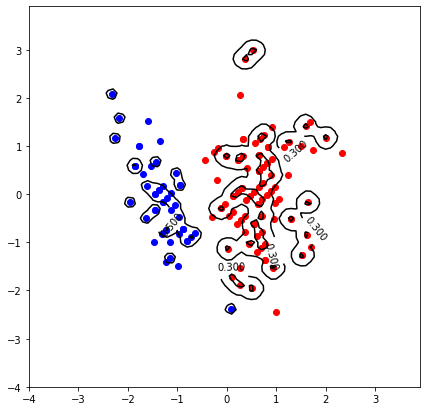

In [29]:
plt.figure(figsize=(7,7))
gr_dataset()
gr_membership_contour(clf.predict)
plt.show()